In [1]:
# 读数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from subprocess import check_output
import warnings
warnings.filterwarnings(action='ignore')

#查看数据目录下的文档
print(check_output(["ls", "./data"]).decode("utf8"))

#读训练数据
df_train = pd.read_csv("./data/train.csv").fillna("")
df_train.head()

quora_test_clean.csv
quora_train_clean.csv
test.csv
test.csv.zip
train.csv
train.csv.zip



,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [2]:
#查看训练数据的结构
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


(404290, 6)

In [3]:
#读测试数据集
df_test = pd.read_csv("./data/test.csv").fillna("")

is_duplicate
0    255027
1    149263
Name: id, dtype: int64


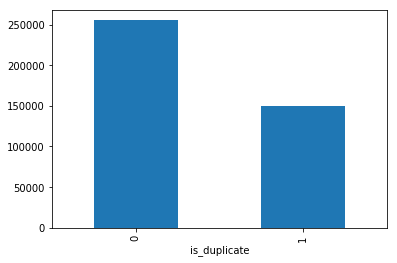

In [4]:
#查看训练数据中标签值的分布情况
df_train.groupby("is_duplicate")['id'].count().plot.bar()
print(df_train.groupby("is_duplicate")['id'].count())

In [12]:
import string

#clean 数据
feats= ['question1','question2']
train_value = df_train[feats].values
test_value = df_test[feats].values

abbr_dict = {
    "what's": "what is",
    "what're": "what are",
    "who's": "who is",
    "who're": "who are",
    "where's": "where is",
    "where're": "where are",
    "when's": "when is",
    "when're": "when are",
    "how's": "how is",
    "how're": "how are",
    "why's": "why is",
    "why're": "why are",

    "i'm": "i am",
    "we're": "we are",
    "you're": "you are",
    "they're": "they are",
    "it's": "it is",
    "he's": "he is",
    "she's": "she is",
    "that's": "that is",
    "there's": "there is",
    "there're": "there are",

    "i've": "i have",
    "we've": "we have",
    "you've": "you have",
    "they've": "they have",
    "who've": "who have",
    "would've": "would have",
    "not've": "not have",

    "i'll": "i will",
    "we'll": "we will",
    "you'll": "you will",
    "he'll": "he will",
    "she'll": "she will",
    "it'll": "it will",
    "they'll": "they will",

    "isn't": "is not",
    "wasn't": "was not",
    "aren't": "are not",
    "weren't": "were not",
    "can't": "can not",
    "couldn't": "could not",
    "don't": "do not",
    "didn't": "did not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "doesn't": "does not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "mustn't": "must not",

    "e-mail": "email",
    "imrovement": 'improvement',
    "intial": "initial",
    "motorolla": "motorola",
    "programing": "programming",
    "quikly": "quickly",
    "demonitization": "demonetization",
    "60k": "60000",
    " 9 11 ":"911",
    " u s ":'american',
    "b g":"bg",
    "e g":'eg',
}


def prepprocessing(question):
    #字符转成小写
    question=str(question).lower()
    #替换简写
    for item in abbr_dict.items():
        question=question.replace(item[0],item[1])
    #去标点符号
    question=question.translate(string.punctuation)
    return question


In [7]:
#清理数据
clean_train_q1 = []
clean_train_q2 = []
for i in np.arange(len(train_value)):
    clean_train_q1.append(prepprocessing(train_value[i][0]))
    clean_train_q2.append(prepprocessing(train_value[i][1]))
    
clean_test_q1 = []
clean_test_q2 = []
for i in np.arange(len(test_value)):
    clean_test_q1.append(prepprocessing(test_value[i][0]))
    clean_test_q2.append(prepprocessing(test_value[i][1]))
    
train_clean = pd.DataFrame()
test_clean = pd.DataFrame()

train_clean['question1'] = clean_train_q1
train_clean['question2'] = clean_train_q2

test_clean['question1'] = clean_test_q1
test_clean['question2'] = clean_test_q2

#train_clean.to_csv('data/quora_train_clean.csv', index=False)
#test_clean.to_csv('data/quora_test_clean.csv', index=False)

In [8]:
#增加训练集的特征
train_clean['len_q1'] = train_clean.question1.apply(lambda x: len(str(x)))
train_clean['len_q2'] = train_clean.question2.apply(lambda x: len(str(x)))
train_clean['len_word_q1'] = train_clean.question1.apply(lambda x: len(str(x).split()))
train_clean['len_word_q2'] = train_clean.question2.apply(lambda x: len(str(x).split()))
train_clean['common_word'] = train_clean.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)
train_clean.head()

test_clean['len_q1'] = test_clean.question1.apply(lambda x: len(str(x)))
test_clean['len_q2'] = test_clean.question2.apply(lambda x: len(str(x)))
test_clean['len_word_q1'] = test_clean.question1.apply(lambda x: len(str(x).split()))
test_clean['len_word_q2'] = test_clean.question2.apply(lambda x: len(str(x).split()))
#test_clean['common_word'] = test_clean.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)


In [9]:
#train_clean.to_csv('data/quora_train_clean_base1.csv', index=False)
#test_clean.to_csv('data/quora_test_clean_base1.csv', index=False)

In [1]:

#再增加字符相似度的特征，使用Levenshtein Distance算法，使用fuzzywuzzy开源码
#import pandas as pd
#train_clean = pd.read_csv("./data/quora_train_clean_base1.csv")
from fuzzywuzzy import fuzz
train_clean['fuzz_qratio'] = train_clean.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
train_clean['fuzz_WRatio'] = train_clean.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
train_clean['fuzz_partial_ratio'] = train_clean.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
train_clean['fuzz_partial_token_set_ratio'] = train_clean.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
train_clean['fuzz_partial_token_sort_ratio'] = train_clean.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis= 1)
train_clean['fuzz_token_set_ratio'] = train_clean.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis = 1)
train_clean['fuzz_token_sort_ratio'] = train_clean.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis = 1)
train_clean.head()

test_clean['fuzz_qratio'] = test_clean.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
test_clean['fuzz_WRatio'] = test_clean.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
test_clean['fuzz_partial_ratio'] = test_clean.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
test_clean['fuzz_partial_token_set_ratio'] = test_clean.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
test_clean['fuzz_partial_token_sort_ratio'] = test_clean.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis= 1)
test_clean['fuzz_token_set_ratio'] = test_clean.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis = 1)
test_clean['fuzz_token_sort_ratio'] = test_clean.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis = 1)

#train_clean.to_csv('data/quora_train_clean_base_feature.csv', index = False)
#test_clean.to_csv('data/quora_test_clean_base_feature.csv', index=False)

In [3]:
#检查分词后，是否有些只是单个字母
def is_all_char(data):
    for index in range(len(data)):
        if len(data[index]) > 1:
            return False
    return True

In [ ]:
#增加tf-idf特征
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import re

pattern = re.compile(r'\b[a-zA-Z]+\b')
tfid = TfidfVectorizer(analyzer='word')
svd = TruncatedSVD(random_state = 42)


def tfid_trans(data):
    question1_tfid = []
    question2_tfid = []
    question12_tfid = []
    question1_svd = []
    question2_svd = []
    question1_2_svd = []
    question12_svd = []
  
    for row in range(len(data)):
        q1 = []
        q2 = []
        q12 = []
       
        r1 = pattern.findall(data.iloc[row]['question1'])
        r2 = pattern.findall(data.iloc[row]['question2'])
        r1_len = len(r1)
        r2_len = len(r2)
        
        if (r1_len == 0 or r2_len == 0) or is_all_char(r1) or is_all_char(r2):                                                            
            question1_tfid.append([0])
            question2_tfid.append([0])
            question12_tfid.append([0])
            question1_svd.append([0])
            question2_svd.append([0])
            question1_2_svd.append([0])
            question12_svd.append([0])
        else:
            q1.append(data.iloc[row]['question1'])
            q2.append(data.iloc[row]['question2'])
            q12.append(data.iloc[row]['question1'])
            q12.append(data.iloc[row]['question2'])

            x1 = tfid.fit_transform(q1)
            x2 = tfid.fit_transform(q2)
            x12 = tfid.fit_transform(q12)
            question1_tfid.append(x1.toarray())
            question2_tfid .append(x2.toarray())
            question12_tfid.append(x12.toarray())
           
            x1_svd = svd.fit_transform(x1.toarray())
            x2_svd = svd.fit_transform(x2.toarray())
            x1_2_svd = svd.fit_transform(np.hstack((x1.toarray(),x2.toarray())))
            x12_svd = svd.fit_transform(x12.toarray())

            question1_svd .append(x1_svd)
            question2_svd .append(x2_svd)
            question1_2_svd.append(x1_2_svd)
            question12_svd.append(x12_svd)
    
    data['q1tfid'] = question1_tfid
    data['q2tfid'] = question2_tfid
    data['q12tfid'] = question12_tfid
    data['q1svd'] = question1_svd
    data['q2svd'] = question2_svd
    data['q1_2svd'] = question1_2_svd
    data['q12svd'] = question12_svd



fid_trans(train_clean.iloc[0:2])
tfid_trans(train_clean)
#tfid_trans(test_clean)

train_clean.to_csv('data/quora_train_clean_base_tfid_feature.csv', index=False)
#test_clean.to_csv('data/quora_test_clean_base_tfid_feature.csv', index=False)\


print(train_clean.iloc[0])
print(max(train_clean['len_word_q1']))
print(max(train_clean['len_word_q2']))
#test_data = copy.deepcopy(train_clean)

def strToarry(data):
    num_pattern = re.compile(r'\d+\.?\d*')
    result = []
    print(len(data))
    for index in range(len(data)):
        X = np.array(num_pattern.findall(data.iloc[index])).reshape(1,-1)
        result.append(X)
    return result

def extend_array(data):
    data_row = data.shape[0]
    data_col = data.shape[1]
    diff_col = 250 - data_col
    new_col = np.zeros((data_row, diff_col))
    data = np.c_[data, new_col]
    return data

In [1]:
#word2Vec 特征
import gensim
from nltk.corpus import stopwords
from nltk import word_tokenize
from tqdm import tqdm
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
stop_words = stopwords.words('english')

def wmd(s1, s2):
    s1 = str(s1).lower().split()
    s2 = str(s2).lower().split()
    stop_words = stopwords.words('english')
    s1 = [w for w in s1 if w not in stop_words]
    s2 = [w for w in s2 if w not in stop_words]
    return model.wmdistance(s1, s2)


def norm_wmd(s1, s2):
    s1 = str(s1).lower().split()
    s2 = str(s2).lower().split()
    stop_words = stopwords.words('english')
    s1 = [w for w in s1 if w not in stop_words]
    s2 = [w for w in s2 if w not in stop_words]
    return norm_model.wmdistance(s1, s2)


def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(model[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    return v / np.sqrt((v ** 2).sum())

In [2]:
#提取word2Vec特征
def getWord2Vec(data):
    model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
    data['wmd'] = data.apply(lambda x: wmd(x['question1'], x['question2']), axis=1)

    norm_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
    norm_model.init_sims(replace=True)
    data['norm_wmd'] = data.apply(lambda x: norm_wmd(x['question1'], x['question2']), axis=1)

    question1_vectors = np.zeros((data.shape[0], 300))
    error_count = 0

    for i, q in tqdm(enumerate(data.question1.values)):
        question1_vectors[i, :] = sent2vec(q)

    question2_vectors  = np.zeros((data.shape[0], 300))
    for i, q in tqdm(enumerate(data.question2.values)):
        question2_vectors[i, :] = sent2vec(q)

    data['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                              np.nan_to_num(question2_vectors))]

    data['cityblock_distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                              np.nan_to_num(question2_vectors))]

    data['jaccard_distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                              np.nan_to_num(question2_vectors))]

    data['canberra_distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                              np.nan_to_num(question2_vectors))]

    data['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                              np.nan_to_num(question2_vectors))]

    data['minkowski_distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                              np.nan_to_num(question2_vectors))]

    data['braycurtis_distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                              np.nan_to_num(question2_vectors))]

    data['skew_q1vec'] = [skew(x) for x in np.nan_to_num(question1_vectors)]
    data['skew_q2vec'] = [skew(x) for x in np.nan_to_num(question2_vectors)]
    data['kur_q1vec'] = [kurtosis(x) for x in np.nan_to_num(question1_vectors)]
    data['kur_q2vec'] = [kurtosis(x) for x in np.nan_to_num(question2_vectors)]

getWord2Vec(train_clean)
getWord2Vec(test_clean)
train_clean.to_csv('data/quora_train_clean_feature_all.csv')
test_clean.to_csv('data/quora_test_clean_feature_except_tfid.csv')


In [7]:
#定义画图的函数
import matplotlib.pyplot as pl

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    rects = pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
                label = "Feature Weight")
    
    # make bar chart higher to fit the text label
    axes = pl.gca()
    axes.set_ylim([0, np.max(values) * 1.1])

    # add text label on each bar
    delta = np.max(values) * 0.02
    
    for rect in rects:
        height = rect.get_height()
        pl.text(rect.get_x() + rect.get_width()/2., 
                height + delta, 
                '%.2f' % height,
                ha='center', 
                va='bottom')
    
    # Detect if xlabels are too long
    rotation = 0 
    for i in columns:
        if len(i) > 20: 
            rotation = 10 # If one is longer than 20 than rotate 10 degrees 
            break
    pl.xticks(np.arange(5), columns, rotation = rotation)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show() 

In [ ]:
train_data = train_clean.iloc[:,4:]
train_y_data = df_train.loc[:,['is_duplicate']]
train_data = train_data.fillna(0)
#去掉tfid特征
del train_data['q1tfid']
del train_data['q2tfid']
del train_data['q12tfid']
del train_data['q1svd']
del train_data['q2svd']
del train_data['q1_2svd']
del train_data['q12svd']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
train score 0.14
validation score 0.70


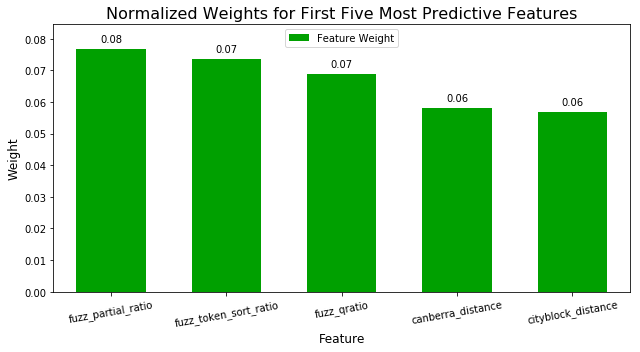

In [12]:
#随机森林分类
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss    

X_train, X_val, y_train, y_val = train_test_split(train_data, train_y_data, test_size = 0.2, random_state = 42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
predict_train = clf.predict_proba(X_train)
predict_val = clf.predict_proba(X_val)

train_score = log_loss(y_train, predict_train)
val_score = log_loss(y_val, predict_val)

print(clf)
print('train score %.2f' % train_score)
print('validation score %.2f' % val_score)

#画图 学习曲线，重要特征，训练及val中的分数，还有test数据的分数图. 选择模型图片
#主要特征
importances = clf.feature_importances_

# 绘图
feature_plot(importances, X_train, y_train)

In [13]:
#画学习曲线
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

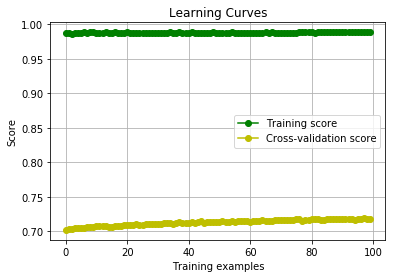

In [14]:
draw_learning_curves(X_train, y_train, clf, 100)

In [ ]:
#模型改进
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf_select = RandomForestClassifier(random_state=42)

parameters = {'max_depth':[4, 5,6,7], 'min_samples_split':[6,4,2], 'min_samples_leaf':[4,3,2,1], 'n_estimators':[40,60,100,150]}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(log_loss)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf_select, parameters, scoring=scorer)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

In [15]:
from sklearn.externals import joblib

joblib.dump(best_clf, './best_random_forest_model.pkl') 
b_train = best_clf.predict_proba(X_train)
b_val = best_clf.predict_proba(X_val)

b_train_score = log_loss(y_train, b_train)
b_val_score = log_loss(y_val, b_val)

print('train score %.2f' % b_train_score)
print('validation score %.2f' % b_val_score)


train score 0.52
validation score 0.53


In [81]:
print(best_clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Unnamed: 0                                                                  404290
question1                        how does the surface pro himself 4 compare wit...
question2                        why did microsoft choose core m3 and not core ...
is_duplicate                                                                   NaN
len_q1                                                                          57
len_q2                                                                          68
len_word_q1                                                                     11
len_word_q2 

In [ ]:
test_data = test_clean.iloc[:,4:]
test_data = test_data.fillna(0)
test_predict = best_clf.predict_proba(test_data)
df_test['is_duplicate'] = test_predict[:,1]
df_test.to_csv('data/test_final_result.csv')

In [106]:
print(df_test.iloc[1]['is_duplicate'])

0.495866962051953


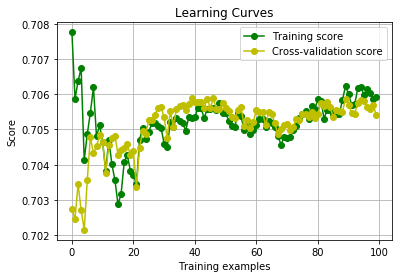

In [16]:
draw_learning_curves(X_train, y_train, best_clf, 100)

len_q1                             int64
len_q2                             int64
len_word_q1                        int64
len_word_q2                        int64
common_word                        int64
fuzz_qratio                        int64
fuzz_WRatio                        int64
fuzz_partial_ratio                 int64
fuzz_partial_token_set_ratio       int64
fuzz_partial_token_sort_ratio      int64
fuzz_token_set_ratio               int64
fuzz_token_sort_ratio              int64
wmd                              float64
norm_wmd                         float64
cosine_distance                  float64
cityblock_distance               float64
jaccard_distance                 float64
canberra_distance                float64
euclidean_distance               float64
minkowski_distance               float64
braycurtis_distance              float64
skew_q1vec                       float64
skew_q2vec                       float64
kur_q1vec                        float64
dtype: object


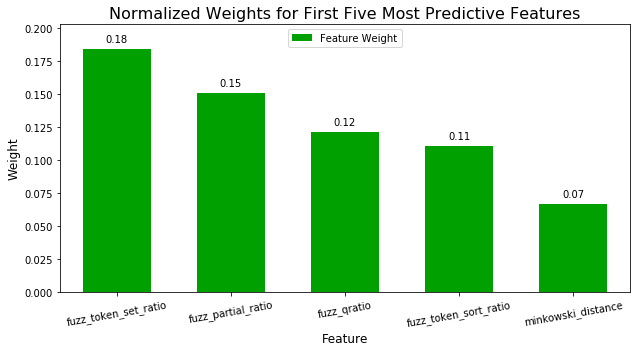

In [112]:
print(X_train.dtypes)
feature_plot(best_clf.feature_importances_, X_train, y_train)

In [69]:
#增加tfidf特征
#将两个问题合并起来
train_q12 = []
for i in range(len(train_clean)):
    train_q12.append(train_clean.iloc[i]['question1'] + train_clean.iloc[i]['question2'])

#取其前500个特征
tfid = TfidfVectorizer(analyzer='word', stop_words='english', max_features = 500)
X12 = tfid.fit_transform(train_q12)

#取其前200个特征
tfid_200 = TfidfVectorizer(analyzer='word', stop_words='english', max_features = 200)
X12_200 = tfid_200.fit_transform(train_q12)

#使用随机森林模型，分别对500特征，得到相应的预测概率，作为新的特征
clf_tfid_12 = RandomForestClassifier()
clf_tfid_12.fit(X12.toarray(), train_y_data)
p_x = clf_tfid_12.predict_proba(X12.toarray())
train_data['q12_tfid_500_predict'] = p_x[:,1]

#训练200特征
clf_tfid_12_200 = RandomForestClassifier()
clf_tfid_12_200.fit(X12_200.toarray(), train_y_data)
p_x_200 = clf_tfid_12_200.predict_proba(X12_200.toarray())
train_data['q12_tfid_200_predict'] = p_x_200[:,1]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
#分别对两个问题提取tfidf特征
train_q1=[]
for i in range(len(train_clean)):
    train_q1.append(train_clean.iloc[i]['question1'])
train_q2=[]
for i in range(len(train_clean)):
    train_q2.append(train_clean.iloc[i]['question2'])

X1_200 = tfid_200.fit_transform(train_q1)

X2_200 = tfid_200.fit_transform(train_q2)

x1_2_200 = np.concatenate((X1_200.toarray(),X2_200.toarray()),axis=1)
clf_tfid_1_2_200 = RandomForestClassifier()
clf_tfid_1_2_200.fit(x1_2_200, train_y_data)
p_x_1_2_200 = clf_tfid_1_2_200.predict_proba(x1_2_200)

train_data['q1_2_tfid_200_predict'] = p_x_1_2_200[:,1]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
from sklearn.decomposition import NMF
#从tfidf特征中获取nmf
model = NMF(n_components = 200, init = 'nndsvd')
q1_nmf = model.fit_transform(X1_200)
q2_nmf = model.fit_transform(X2_200)
q12_nmf = model.fit_transform(X12_200)

#训练nmf特征
nmf1_2_200 = np.concatenate((q1_nmf,q2_nmf),axis=1)
clf_nmf_1_2_200 = RandomForestClassifier()
clf_nmf_1_2_200.fit(nmf1_2_200, train_y_data)
p_nmf_1_2_200 = clf_nmf_1_2_200.predict_proba(nmf1_2_200)
train_data['q1_2_nmf_200_predict'] = p_nmf_1_2_200[:,1]

clf_nmf_12_200 = RandomForestClassifier()
clf_nmf_12_200.fit(q12_nmf, train_y_data)
q12_nmf_200_predict = clf_nmf_12_200.predict_proba(q12_nmf)

train_data['q12_nmf_200_predict'] = q12_nmf_200_predict[:,1]


In [58]:
#xgboost训练
from xgboost import XGBClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss    

X_train, X_val, y_train, y_val = train_test_split(train_data, train_y_data, test_size = 0.2, random_state = 42)

clf2 = XGBClassifier(max_depth = 7, learning_rate = 0.2, random_state=42)
evl_set = [(X_train, y_train), (X_val, y_val)]
clf2.fit(X_train, y_train, eval_metric=["logloss"], eval_set = evl_set)
results = clf2.evals_result()

[0]	validation_0-logloss:0.563562	validation_1-logloss:0.563379
[1]	validation_0-logloss:0.475186	validation_1-logloss:0.476594
[2]	validation_0-logloss:0.412778	validation_1-logloss:0.414723
[3]	validation_0-logloss:0.367192	validation_1-logloss:0.368616
[4]	validation_0-logloss:0.332224	validation_1-logloss:0.33364
[5]	validation_0-logloss:0.304273	validation_1-logloss:0.306469
[6]	validation_0-logloss:0.283077	validation_1-logloss:0.285288
[7]	validation_0-logloss:0.266263	validation_1-logloss:0.268772
[8]	validation_0-logloss:0.252605	validation_1-logloss:0.255686
[9]	validation_0-logloss:0.2418	validation_1-logloss:0.24511
[10]	validation_0-logloss:0.233559	validation_1-logloss:0.236636
[11]	validation_0-logloss:0.226198	validation_1-logloss:0.229765
[12]	validation_0-logloss:0.22045	validation_1-logloss:0.224065
[13]	validation_0-logloss:0.215674	validation_1-logloss:0.219736
[14]	validation_0-logloss:0.211773	validation_1-logloss:0.215927
[15]	validation_0-logloss:0.208811	valid

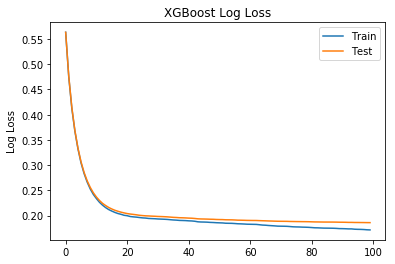

In [59]:
#画图
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)  

# plot log loss  
fig, ax = plt.subplots()  
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')  
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')  
ax.legend()  
plt.ylabel('Log Loss')  
plt.title('XGBoost Log Loss')  
plt.show()  

In [70]:
from sklearn.externals import joblib

#joblib.dump(clf2, './xgboost_model.pkl') 
#print(train_data.iloc[0])

#增加tfidf特征
#将两个问题合并起来
test_q12 = []
for i in range(len(test_clean)):
    test_q12.append(str(test_clean.iloc[i]['question1']) + str(test_clean.iloc[i]['question2']))

#取其前500个特征
X12_test = tfid.fit_transform(test_q12)

#取其前200个特征

X12_200_test = tfid_200.fit_transform(test_q12)

#使用随机森林模型，分别对500特征，得到相应的预测概率，作为新的特征
p_x_test = clf_tfid_12.predict_proba(X12_test.toarray())
test_data['q12_tfid_500_predict'] = p_x_test[:,1]

#训练200特征
p_x_200_test = clf_tfid_12_200.predict_proba(X12_200_test.toarray())
test_data['q12_tfid_200_predict'] = p_x_200_test[:,1]

In [ ]:
#分别对两个问题提取tfidf特征
test_clean['question1'] = test_clean['question1'].fillna('')
test_clean['question2'] = test_clean['question2'].fillna('')
test_q1=[]
for i in range(len(test_clean)):
    test_q1.append(test_clean.iloc[i]['question1'])
test_q2=[]
for i in range(len(test_clean)):
    test_q2.append(test_clean.iloc[i]['question2'])

X1_200_test = tfid_200.fit_transform(test_q1)

X2_200_test = tfid_200.fit_transform(test_q2)

x1_2_200_test = np.concatenate((X1_200_test.toarray(),X2_200_test.toarray()),axis=1)
p_x_1_2_200_test = clf_tfid_1_2_200.predict_proba(x1_2_200_test)
test_data['q1_2_tfid_200_predict'] = p_x_1_2_200_test[:,1]

In [ ]:
q1_nmf_test = model.fit_transform(X1_200_test)
q2_nmf_test = model.fit_transform(X2_200_test)
q12_nmf_test = model.fit_transform(X12_200_test)

#训练nmf特征
nmf1_2_200_test = np.concatenate((q1_nmf_test,q2_nmf_test),axis=1)
p_nmf_1_2_200_test = clf_nmf_1_2_200.predict_proba(nmf1_2_200_test)
test_data['q1_2_nmf_200_predict'] = p_nmf_1_2_200_test[:,1]

q12_nmf_200_predict_test = clf_nmf_12_200.predict_proba(q12_nmf_test)

test_data['q12_nmf_200_predict'] = q12_nmf_200_predict_test[:,1]


In [ ]:
def adj(x,te=0.173,tr=0.369):
    a=te/tr
    b=(1-te)/(1-tr)
    return a*x/(a*x+b*(1-x))

#用训练好的xgboost 预测test数据
test_predict = clf2.predict_proba(test_data)

df_test['is_duplicate'] = test_predict[:,1]
df_test.is_duplicate=df_test.is_duplicate.apply(adj)
df_test.to_csv('./data/test_result.csv', index = False)